<a href="https://colab.research.google.com/github/bforseth15/WSU-College-Portfolio/blob/main/Copy_of_Master_Doc_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis


In [1]:
# ------------------------------
# PARAMETERS & CONFIGURATION
# ------------------------------
num_portfolios = 10_000   # Choose number of random portfolios for optimization
mc_sims = 1_000           # Choose number of Monte Carlo simulation paths
T = 252                   # Simulation horizon in days
initial_value = 100_000   # Initial portfolio value in USD
alpha = 5                 # Percentile for risk metrics (e.g., 5 implies 95% confidence)
default_tickers = ['AXP', 'ORCL', 'META', 'NVDA', 'XOM',]

In [2]:
# ------------------------------
# DATA LOADING & PREPROCESSING
# ------------------------------
!pip install yfinance -q
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(tickers=default_tickers, start_date="2021-01-01", end_date="2024-12-31"):
    """
    Loads historical price data from Yahoo Finance.
    """
    print(f"Fetching data for {tickers} from {start_date} to {end_date}...")
    data = yf.download(tickers, start=start_date, end=end_date)['Close']

    # Handle missing values (forward-fill then back-fill as a fallback)
    data.fillna(method='ffill', inplace=True)
    data.fillna(method='bfill', inplace=True)

    return data

# Load data and display a sample
data = load_data()
print("Data sample:")
print(data.head())

# Compute daily returns
returns = data.pct_change().dropna()

Fetching data for ['AXP', 'ORCL', 'META', 'NVDA', 'XOM'] from 2021-01-01 to 2024-12-31...


/tmp/ipython-input-1533141845.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  5 of 5 completed

Data sample:
Ticker             AXP        META       NVDA       ORCL        XOM
Date                                                               
2021-01-04  111.249779  267.292236  13.077453  59.565727  34.215038
2021-01-05  111.843559  269.309723  13.367903  58.827568  35.863960
2021-01-06  115.981026  261.696716  12.579826  58.686890  36.779114
2021-01-07  115.063622  267.093414  13.307318  59.155849  37.067661
2021-01-08  115.177124  265.930603  13.240253  59.446625  37.479900



/tmp/ipython-input-1533141845.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/tmp/ipython-input-1533141845.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [3]:
# Compute log returns and drop any missing values
log_returns = np.log(data / data.shift(1)).dropna()
print("Log returns sample:")
print(log_returns.head())

Log returns sample:
Ticker           AXP      META      NVDA      ORCL       XOM
Date                                                        
2021-01-05  0.005323  0.007520  0.021967 -0.012470  0.047068
2021-01-06  0.036326 -0.028676 -0.060762 -0.002394  0.025197
2021-01-07 -0.007941  0.020412  0.056220  0.007959  0.007815
2021-01-08  0.000986 -0.004363 -0.005052  0.004903  0.011060
2021-01-11 -0.005930 -0.040928  0.025635 -0.005538  0.029905


# **Correlation Analysis:**

The correlation heatmap and pair plot show how stocks move relative to each other. Low or negative correlations are beneficial for diversification.

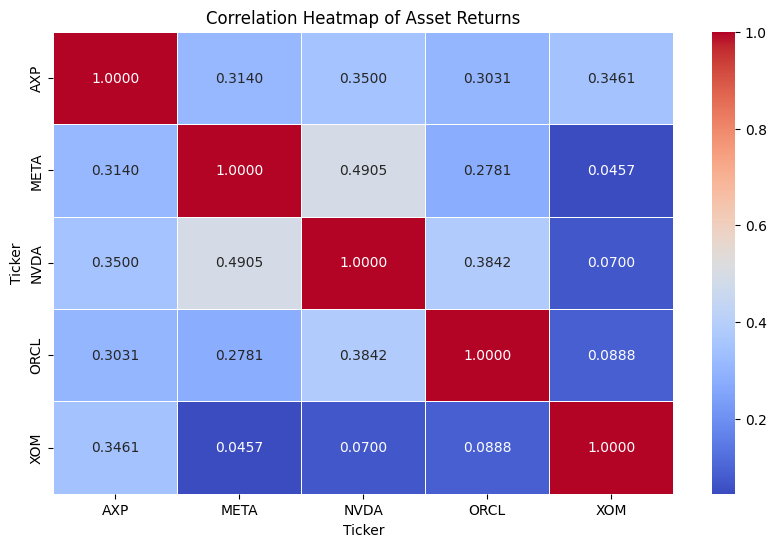

In [4]:
# 1. Correlation Heatmap--- added
plt.figure(figsize=(10, 6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
plt.title("Correlation Heatmap of Asset Returns")
plt.show()

# **Time Series Visualization:**
Observing the price evolution of different stocks helps us understand trends and potential volatility.

In [5]:
import plotly.graph_objects as go

# Assuming 'returns' is your DataFrame with datetime index
cumulative_returns = (1 + returns).cumprod()

# Create the figure using Plotly
fig = go.Figure()

# Add traces for each asset
for column in cumulative_returns.columns:
    fig.add_trace(go.Scatter(x=cumulative_returns.index,
                             y=cumulative_returns[column],
                             mode='lines',
                             name=column))

# Update layout for better aesthetics
fig.update_layout(
    title="Cumulative Returns of Assets",
    xaxis_title="Date",
    yaxis_title="Cumulative Returns",
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    hovermode='x unified'  # This enables showing the correlation of all lines when hovering
)

# Show the figure
fig.show()

# **Distribution of Log Returns:**
Histograms of log returns (with a KDE [Kernel Density Estimation] overlay) reveal the distributional characteristics of returns, which is important for risk assessment.

<Figure size 1200x600 with 0 Axes>

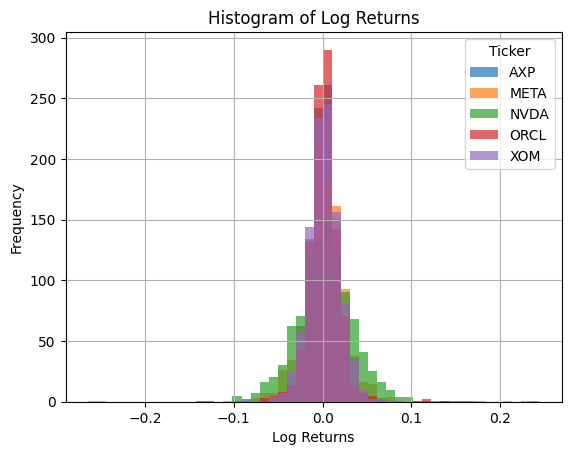

In [6]:
# 3. Histogram of Log Returns
plt.figure(figsize=(12, 6))
returns.plot(kind='hist', bins=50, alpha=0.7, legend=True)
plt.title("Histogram of Log Returns")
plt.xlabel("Log Returns")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# **Rolling Correlation:**
The rolling correlation plot provides insight into how the relationship between specific assets (e.g., AXP and ORCL) changes over time.

In [ ]:
# Compute and plot a rolling 60-day correlation between AXP and ORCL
# Calculate log returns
import numpy as np
import pandas as pd
import plotly.express as px

# Assuming `returns` DataFrame is already defined
log_returns = np.log(1 + returns)

# Calculate rolling correlation
rolling_corr = log_returns["AXP"].rolling(window=60).corr(log_returns["ORCL"]).dropna()

# Create interactive Plotly figure
fig = px.line(
    rolling_corr,
    title="Rolling 60-Day Correlation Between AXP and ORCL",
    labels={"index": "Date", "value": "Correlation"},
)

# Customize layout
fig.update_traces(line=dict(color="purple"))
fig.update_layout(
    hovermode="x unified",
    xaxis_title="Date",
    yaxis_title="Correlation",
    template="plotly_white"
)

# Show interactive plot
fig.show()


# **Portfolio Construction & Optimization**

# ** 10-Year Treasury Rate according to https://ycharts.com/indicators/10_year_treasury_rate#:~:text=Basic%20Info,day%20and%204.31%25%20last%20year. = 4.25% as of 2/27/25

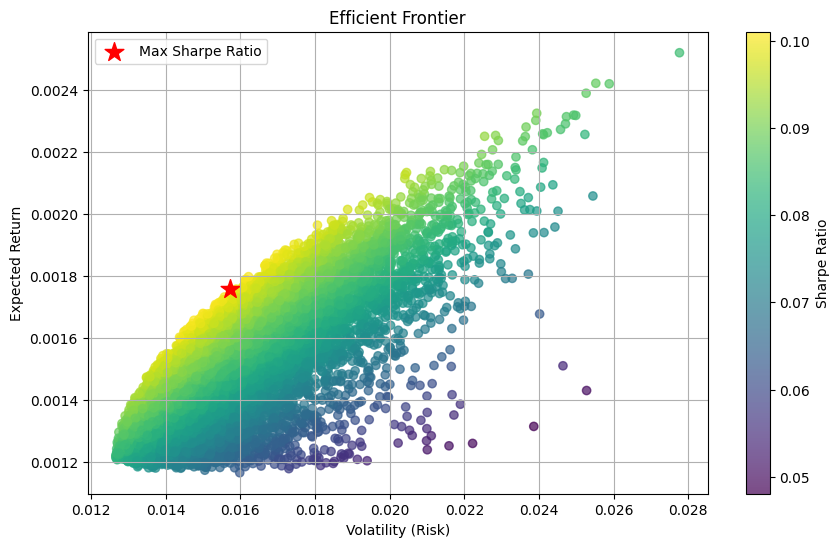

Optimal Portfolio Weights:
AXP: 8.42%
ORCL: 0.94%
META: 31.88%
NVDA: 17.20%
XOM: 41.55%


In [7]:
# ------------------------------
# PORTFOLIO OPTIMIZATION
# ------------------------------

import numpy as np
import matplotlib.pyplot as plt
 # Risk Free rate is as of 2/26/25 for a 10 Year T-Bill
def generate_random_portfolios(returns, num_portfolios, risk_free_rate=0.0425):
    """
    Generates random portfolios and computes:
      - Expected daily return.
      - Daily volatility.
      - Sharpe ratio.
    """
    n_assets = returns.shape[1]
    mean_daily_returns = returns.mean()
    cov_matrix = returns.cov()

    # Generate random weights for each portfolio and normalize them to sum to 1
    weights_array = np.random.random((num_portfolios, n_assets))
    weights_array /= weights_array.sum(axis=1)[:, None]
  # Daily risk free Calculation
    daily_risk_free_rate = risk_free_rate / 252

    # Compute portfolio return and volatility
    port_returns = np.dot(weights_array, mean_daily_returns)
    port_volatility = np.sqrt(np.einsum('ij,jk,ik->i', weights_array, cov_matrix.values, weights_array))
    sharpe_ratios = (port_returns - daily_risk_free_rate)/ port_volatility
    return weights_array, port_returns, port_volatility, sharpe_ratios

# Generate portfolios and identify the optimal one based on maximum Sharpe ratio
weights_array, port_returns, port_volatility, sharpe_ratios = generate_random_portfolios(returns, num_portfolios)

max_sharpe_idx = sharpe_ratios.argmax()
optimal_weights = weights_array[max_sharpe_idx]
optimal_return = port_returns[max_sharpe_idx]
optimal_volatility = port_volatility[max_sharpe_idx]

# ------------------------------
# PLOTTING THE EFFICIENT FRONTIER
# ------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(port_volatility, port_returns, c=sharpe_ratios, cmap='viridis', marker='o', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.scatter(optimal_volatility, optimal_return, color='red', marker='*', s=200, label='Max Sharpe Ratio')
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------
# PRINT OPTIMAL PORTFOLIO WEIGHTS
# ------------------------------
print("Optimal Portfolio Weights:")
for stock, weight in zip(default_tickers, optimal_weights):
    print(f"{stock}: {weight:.2%}")




# **Monte Carlo Simulation and Risk Analysis:**

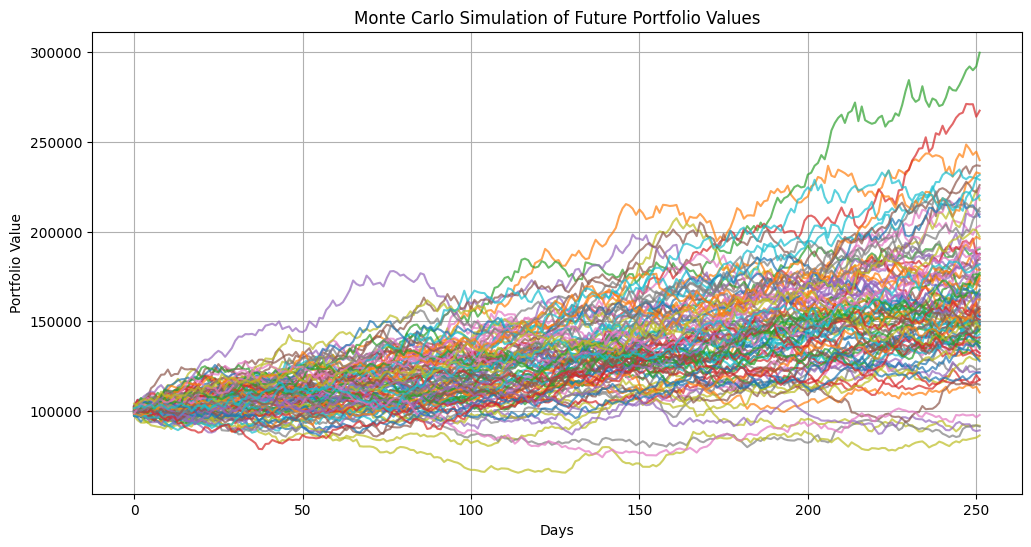

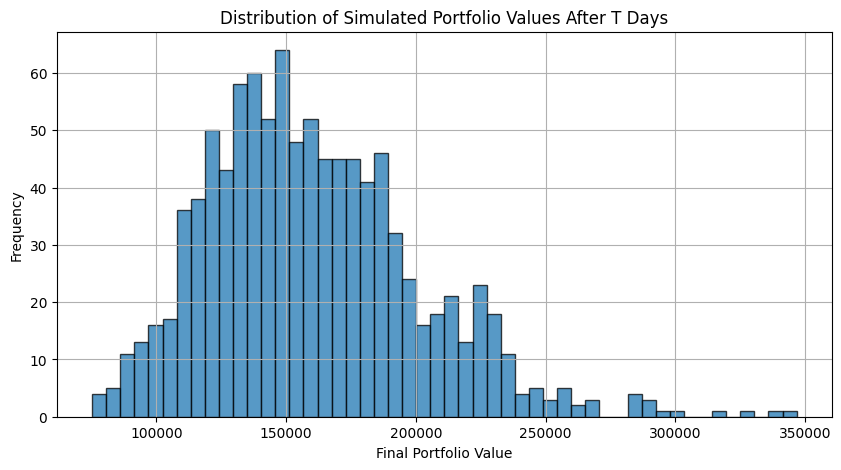

In [8]:
# ------------------------------
# MONTE CARLO SIMULATION FOR FUTURE PORTFOLIO VALUES
# ------------------------------

import numpy as np
import matplotlib.pyplot as plt

def simulate_future_portfolio(returns, optimal_weights, initial_value, mc_sims, T):
    """
    Simulates future portfolio values using Monte Carlo methods.

    Uses historical log returns to simulate future paths via the Cholesky decomposition.
    Portfolio value is computed as: initial_value * exp(cumulative log returns).
    """
    mean_returns = returns.mean().values
    cov_matrix = returns.cov().values
    L = np.linalg.cholesky(cov_matrix)

    simulations = np.zeros((T, mc_sims))

    for i in range(mc_sims):
        # Generate correlated random returns
        random_shocks = np.random.normal(size=(T, len(returns.columns)))
        correlated_returns = random_shocks @ L.T + mean_returns
        daily_log_returns = np.dot(correlated_returns, optimal_weights)
        portfolio_growth = np.exp(np.cumsum(daily_log_returns))
        simulations[:, i] = portfolio_growth * initial_value

    return simulations

# Run simulation using the optimal portfolio weights
simulations = simulate_future_portfolio(returns, optimal_weights, initial_value, mc_sims, T)

# ------------------------------
# PLOTTING SIMULATION PATHS
# ------------------------------
plt.figure(figsize=(12, 6))
plt.plot(simulations[:, :100], alpha=0.7)  # Plot 100 random simulation paths
plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Monte Carlo Simulation of Future Portfolio Values")
plt.grid(True)
plt.show()

# ------------------------------
# HISTOGRAM OF SIMULATED FINAL VALUES
# ------------------------------
plt.figure(figsize=(10, 5))
plt.hist(simulations[-1, :], bins=50, edgecolor='black', alpha=0.75)
plt.xlabel("Final Portfolio Value")
plt.ylabel("Frequency")
plt.title("Distribution of Simulated Portfolio Values After T Days")
plt.grid(True)
plt.show()


# **Risk Metrics (VaR, CVaR)**

In [9]:
# Set the confidence level (e.g., 95% confidence)
confidence_level = 0.95
# Assume an initial portfolio value (in dollars)
initial_value = 100_000

# Call generate_random_portfolios to get portfolio_returns
_, portfolio_returns, _, _ = generate_random_portfolios(returns, num_portfolios)

# Calculate VaR as the (1 - confidence_level) percentile of portfolio returns
VaR = np.percentile(portfolio_returns, (1 - confidence_level) * 100)
# Convert VaR to percentage losses (as absolute values)
VaR_percent = abs(VaR) * 100
# Calculate the potential dollar losses using the initial portfolio value
VaR_dollar = initial_value * abs(VaR)

print(f"Portfolio VaR (95% confidence): {VaR:.4f} or {VaR_percent:.2f}% loss, approx. ${VaR_dollar:,.2f}")


Portfolio VaR (95% confidence): 0.0012 or 0.12% loss, approx. $124.16


In [10]:
# CVaR (or Expected Shortfall) is the average of returns that are less than or equal to the VaR
CVaR = portfolio_returns[portfolio_returns <= VaR].mean()
# Convert CVaR to percentage losses (as absolute values)
CVaR_percent = abs(CVaR) * 100
# Calculate the potential dollar losses using the initial portfolio value
CVaR_dollar = initial_value * abs(CVaR)

print(f"Portfolio CVaR (95% confidence): {CVaR:.4f} or {CVaR_percent:.2f}% loss, approx. ${CVaR_dollar:,.2f}")

Portfolio CVaR (95% confidence): 0.0012 or 0.12% loss, approx. $121.83


Value at Risk (VaR) at 95% confidence: $13074.46
Conditional Value at Risk (CVaR) at 95% confidence: $18572.15
Maximum Drawdown (MDD): 15.75%


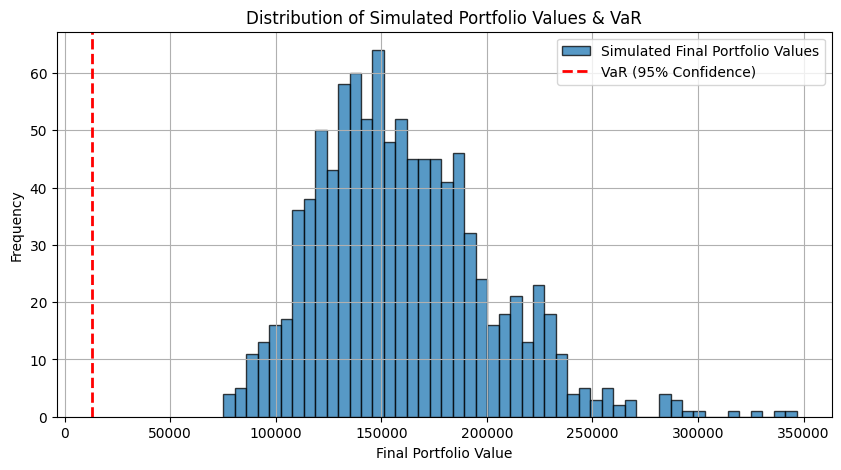

In [11]:
# ------------------------------
# RISK METRICS: VaR, CVaR, and Additional Measures
# ------------------------------

import numpy as np
import matplotlib.pyplot as plt

def compute_risk_metrics(simulations, alpha, initial_value):
    """
    Computes risk metrics based on the simulated portfolio outcomes:
      - Value at Risk (VaR) at the alpha percentile.
      - Conditional VaR (CVaR) as the average loss beyond VaR.
      - Maximum Drawdown (MDD).
    """
    final_values = simulations[-1, :]  # Extract final portfolio values

    # Compute Value at Risk (VaR)
    var_threshold = np.percentile(final_values, alpha)
    var_loss = initial_value - var_threshold  # Loss amount

    # Compute Conditional VaR (CVaR)
    cvar_threshold = final_values[final_values <= var_threshold].mean()
    cvar_loss = initial_value - cvar_threshold  # Expected loss beyond VaR

    # Compute Maximum Drawdown (MDD)
    cumulative_returns = simulations / initial_value
    peak = np.maximum.accumulate(cumulative_returns, axis=0)
    drawdown = (peak - cumulative_returns) / peak
    max_drawdown = np.max(drawdown, axis=0).mean()  # Averaged across simulations

    return {
        "VaR_dollar": var_loss,
        "CVaR_dollar": cvar_loss,
        "Max_Drawdown": max_drawdown
    }

# Compute risk metrics at a 99% (alpha = 1) confidence level
risk_metrics = compute_risk_metrics(simulations, alpha=1, initial_value=initial_value)

# Print risk metrics
print(f"Value at Risk (VaR) at {100-alpha}% confidence: ${risk_metrics['VaR_dollar']:.2f}")
print(f"Conditional Value at Risk (CVaR) at {100-alpha}% confidence: ${risk_metrics['CVaR_dollar']:.2f}")
print(f"Maximum Drawdown (MDD): {risk_metrics['Max_Drawdown']:.2%}")

# ------------------------------
# PLOTTING DISTRIBUTION OF FINAL PORTFOLIO VALUES & VaR THRESHOLD
# ------------------------------
plt.figure(figsize=(10, 5))
plt.hist(simulations[-1, :], bins=50, edgecolor='black', alpha=0.75, label="Simulated Final Portfolio Values")
plt.axvline(risk_metrics['VaR_dollar'], color='r', linestyle='dashed', linewidth=2, label=f"VaR ({100-alpha}% Confidence)")
plt.xlabel("Final Portfolio Value")
plt.ylabel("Frequency")
plt.title("Distribution of Simulated Portfolio Values & VaR")
plt.legend()
plt.grid(True)
plt.show()
